In [2]:
## Long Short-Term Memory Model (LSTM) followed by FNN
## No Shuffle
## Feb - July 2022
## Lookback= 10

In [7]:
import sys
sys.path.append('/home/jovyan/work/')
sys.path.append('/home/jovyan/work/src')
sys.path.append('/home/jovyan/work/src/data')
sys.path.append('/home/jovyan/work/src/data_explore')
sys.path.append('/home/jovyan/work/src/features')
sys.path.append('/home/jovyan/work/src/models')
sys.path.append('/home/jovyan/work/src/analysis')


In [8]:
print(sys.path)

['/home/jovyan/work/notebooks', '/opt/conda/lib/python311.zip', '/opt/conda/lib/python3.11', '/opt/conda/lib/python3.11/lib-dynload', '', '/opt/conda/lib/python3.11/site-packages', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis', '/home/jovyan/work/', '/home/jovyan/work/src', '/home/jovyan/work/src/data', '/home/jovyan/work/src/data_explore', '/home/jovyan/work/src/features', '/home/jovyan/work/src/models', '/home/jovyan/work/src/analysis']


In [9]:
from src import data,data_explore,features
from data import create_input_data
from data_explore import explore_util
from features import build_features
from models import train_model,predict_model
from analysis import analyze_pred

In [10]:
df = create_input_data.read_data(csv_file_name="../data/raw/anon_jobs_1Feb2022_1Aug2022_normal_sorted.csv", parse_dates_col=[4,5,6])
df

,jobid,user,account,state,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes,run_minutes,nodelist
0,9084275,5a1c85eb8bc9d4da20ce12b96ecc7bb9d79d3ef991e990...,38112a802292edea407a0678c9c75259cba6473c7acc62...,COMPLETED,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 18:10:39,1,1,2880,0,131060,143,20382,7955377,1080,c442-022
1,9084279,b4b4df9343fe9f7110ec15863fb5df13fbd20268383ba9...,9490a70089cec5b24a43f5f535efc92180fc5383256414...,COMPLETED,2022-02-01 00:11:44,2022-02-01 07:44:39,2022-02-01 09:00:46,78,6,180,452,131060,143,20382,7955377,76,"c446-[062,111,122],c447-[061-063]"
2,9084280,c593da51b38e5fd95cb891ec53a4b70c41ca189bf4b92d...,3a61323a47592f74d9ca0004a066b2019b8fc1d4c53283...,COMPLETED,2022-02-01 00:12:27,2022-02-01 00:12:27,2022-02-01 00:12:39,68,1,1,0,131240,144,20382,7955377,0,c403-034
3,9084291,db3b1cee65585e6744e72478a737eafaa23ce99e81344e...,118341ad5b87466ce69926005d0d6ba762bf86b8996da7...,COMPLETED,2022-02-01 00:16:45,2022-02-01 04:43:31,2022-02-01 06:15:04,64,1,2880,266,131100,142,20383,7955378,91,c438-021
4,9084294,bb3cdc72e4a6895d67d00ccd3c9cf0f65bdc59f32dfa9e...,664af438b9c1ef9ba68a8105b0ce50f87b8bc462486043...,COMPLETED,2022-02-01 00:17:49,2022-02-01 00:17:51,2022-02-01 00:58:55,64,1,58,0,133980,143,20383,7955378,41,c403-034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
323211,10056827,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,4,898116,394,22918,9692906,23,c469-061
323212,10056828,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,5,898236,395,22918,9692906,54,c469-011
323213,10056829,4a4f2198bac2558f9e5a8c5eb68e7ba4a163c55ce93e37...,fa2629c2b0c98b9f3d8366895b45442f1f33b51ef9f075...,COMPLETED,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,5,898356,396,22918,9692906,38,c469-092
323214,10056831,4c6876a9c556f9039eb938f387f82f71400b3eafa372b2...,140bedbf9c3f6d56a9846d2ba7088798683f4da0c24823...,COMPLETED,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,239,898356,396,22918,9692906,129,"c412-074,c422-113"


In [11]:
lstm_df = build_features.remove_cols(df,['jobid','user','account','state','run_minutes','nodelist'])

In [12]:
lstm_df

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
0,2022-02-01 00:10:00,2022-02-01 00:10:02,2022-02-01 18:10:39,1,1,2880,0,131060,143,20382,7955377
1,2022-02-01 00:11:44,2022-02-01 07:44:39,2022-02-01 09:00:46,78,6,180,452,131060,143,20382,7955377
2,2022-02-01 00:12:27,2022-02-01 00:12:27,2022-02-01 00:12:39,68,1,1,0,131240,144,20382,7955377
3,2022-02-01 00:16:45,2022-02-01 04:43:31,2022-02-01 06:15:04,64,1,2880,266,131100,142,20383,7955378
4,2022-02-01 00:17:49,2022-02-01 00:17:51,2022-02-01 00:58:55,64,1,58,0,133980,143,20383,7955378
...,...,...,...,...,...,...,...,...,...,...,...
323211,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,4,898116,394,22918,9692906
323212,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,5,898236,395,22918,9692906
323213,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,5,898356,396,22918,9692906
323214,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,239,898356,396,22918,9692906


In [13]:
lstm_df= build_features.slice_df(lstm_df,1000,323216)

In [14]:
lstm_df.shape

(322216, 11)

In [15]:
lstm_df[120:130]

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
1120,2022-02-01 23:41:38,2022-02-02 02:51:38,2022-02-02 14:39:56,1,1,1200,190,247376,212,20395,7967258
1121,2022-02-01 23:41:39,2022-02-02 02:51:38,2022-02-02 14:17:18,1,1,1200,189,248576,213,20395,7967258
1122,2022-02-01 23:41:39,2022-02-02 02:51:38,2022-02-02 14:39:23,1,1,1200,189,249776,214,20395,7967258
1123,2022-02-01 23:45:03,2022-02-01 23:45:04,2022-02-01 23:50:40,68,1,10,0,249896,210,20395,7967258
1124,2022-02-01 23:54:48,2022-02-02 01:04:42,2022-02-02 02:27:55,1376,21,90,69,247466,198,20395,7967258
1125,2022-02-01 23:58:05,2022-02-02 00:02:17,2022-02-02 00:16:48,1,1,30,4,247556,199,20395,7967258
1126,2022-02-01 23:59:32,2022-02-02 02:51:38,2022-02-02 08:49:10,272,4,2880,172,247586,200,20395,7967258
1127,2022-02-02 00:04:55,2022-02-02 00:04:55,2022-02-02 16:29:56,6,1,2880,0,250196,198,20395,7967258
1128,2022-02-02 00:25:25,2022-02-02 04:32:47,2022-02-02 07:08:39,8064,252,160,247,237266,164,20395,7967258
1129,2022-02-02 00:36:12,2022-02-02 00:36:13,2022-02-02 12:36:43,64,1,1200,0,233946,155,20395,7967258


In [16]:
lstm_df.iloc[0:1,]

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
1000,2022-02-01 21:38:52,2022-02-01 21:49:27,2022-02-01 21:59:46,1,1,120,10,268796,275,20395,7967258


In [17]:
lstm_df.columns.get_loc("submit")

0

In [18]:
lstm_df.iloc[0,lstm_df.columns.get_loc("submit")]

Timestamp('2022-02-01 21:38:52')

In [19]:
i=123
row=124
lstm_df.iloc[i, lstm_df.columns.get_loc("start")] < lstm_df.iloc[row, lstm_df.columns.get_loc("submit")]

True

In [20]:
lstm_df.at[1000,'submit']

Timestamp('2022-02-01 21:38:52')

In [21]:
from importlib import reload
reload(build_features)
Y_waittimedata = lstm_df['queue_minutes']
X_historydata_train, X_historydata_test, Y_waittimedata_train, Y_waittimedata_test=build_features.split_training_test_data_no_shuffle(lstm_df, Y_waittimedata)

shapes: X train: (241662, 11) Y train: (241662,)
shapes: X test: (80554, 11)Y test: (80554,)


In [22]:
X_historydata_train.head()

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
1000,2022-02-01 21:38:52,2022-02-01 21:49:27,2022-02-01 21:59:46,1,1,120,10,268796,275,20395,7967258
1001,2022-02-01 21:38:53,2022-02-01 21:48:04,2022-02-01 21:58:02,1,1,120,9,268916,276,20395,7967258
1002,2022-02-01 21:38:54,2022-02-01 21:48:04,2022-02-01 21:57:06,1,1,120,9,269036,277,20395,7967258
1003,2022-02-01 21:38:54,2022-02-01 21:48:04,2022-02-01 21:57:02,1,1,120,9,269156,278,20395,7967258
1004,2022-02-01 21:38:55,2022-02-01 21:48:04,2022-02-01 21:56:51,1,1,120,9,269276,279,20395,7967258


In [23]:
X_historydata_test.head()

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
242662,2022-06-25 22:39:22,2022-06-25 23:40:34,2022-06-26 02:55:50,1280,20,720,61,182220,161,22360,9229013
242663,2022-06-25 22:39:43,2022-06-25 22:51:29,2022-06-25 22:53:39,24,1,20,11,182940,162,22360,9229013
242664,2022-06-25 22:42:02,2022-06-25 23:43:52,2022-06-25 23:53:43,64,2,240,61,182960,163,22360,9229013
242665,2022-06-25 22:42:28,2022-06-25 23:45:28,2022-06-25 23:55:03,64,2,240,63,183200,164,22360,9229013
242666,2022-06-25 22:42:36,2022-06-25 23:42:16,2022-06-25 23:42:52,68,1,2160,59,183440,165,22360,9229013


In [24]:
Y_waittimedata.head()

1000    10
1001     9
1002     9
1003     9
1004     9
Name: queue_minutes, dtype: int64

In [25]:
Y_waittimedata_test.head()

242662    61
242663    11
242664    61
242665    63
242666    59
Name: queue_minutes, dtype: int64

In [26]:
lstm_df_for_standardization=build_features.remove_cols(X_historydata_train,['submit','start','end'])
print("DF for Standardization for LSTMinput : " + str(lstm_df_for_standardization.shape))

DF for Standardization for LSTMinput : (241662, 8)


In [27]:
lstm_df_for_standardization.head()

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
1000,1,1,120,10,268796,275,20395,7967258
1001,1,1,120,9,268916,276,20395,7967258
1002,1,1,120,9,269036,277,20395,7967258
1003,1,1,120,9,269156,278,20395,7967258
1004,1,1,120,9,269276,279,20395,7967258


In [28]:
lstm_df_for_standardization.iloc[0,:]

reqcpus                   1
nnodes                    1
max_minutes             120
queue_minutes            10
backlog_minutes      268796
backlog_num_jobs        275
running_num_jobs      20395
running_minutes     7967258
Name: 1000, dtype: int64

In [29]:
X_historydata_norm, scaler = build_features.standardization(lstm_df_for_standardization)

MinMaxScaler()
data max = [3.276800e+04 2.560000e+02 9.000000e+03 2.814500e+04 1.414325e+06
 7.010000e+02 2.236000e+04 9.229013e+06]
data min = [1.000000e+00 1.000000e+00 1.000000e+00 0.000000e+00 0.000000e+00
 0.000000e+00 2.039500e+04 7.967258e+06]
data range = [3.276700e+04 2.550000e+02 8.999000e+03 2.814500e+04 1.414325e+06
 7.010000e+02 1.965000e+03 1.261755e+06]
per feature scale =[3.05185095e-05 3.92156863e-03 1.11123458e-04 3.55302896e-05
 7.07051067e-07 1.42653352e-03 5.08905852e-04 7.92546889e-07]


In [30]:
X_historydata_norm[0,:]

array([0.00000000e+00, 0.00000000e+00, 1.32236915e-02, 3.55302896e-04,
       1.90052499e-01, 3.92296719e-01, 0.00000000e+00, 0.00000000e+00])

In [31]:
X_historydata_norm.shape

(241662, 8)

In [32]:
lstm_df.shape

(322216, 11)

In [33]:
reload(create_input_data)
lookback = 10
lstm_inputall10, rows_to_discard10 = create_input_data.input_data_lstm_array(lookback, X_historydata_train,X_historydata_norm)

*** loopback count never equals to  lookback. so do not consider the row 10
*** loopback count never equals to  lookback. so do not consider the row 11
*** loopback count never equals to  lookback. so do not consider the row 12
*** loopback count never equals to  lookback. so do not consider the row 13
*** loopback count never equals to  lookback. so do not consider the row 14
*** loopback count never equals to  lookback. so do not consider the row 15
*** loopback count never equals to  lookback. so do not consider the row 16
*** loopback count never equals to  lookback. so do not consider the row 17
*** loopback count never equals to  lookback. so do not consider the row 18
*** loopback count never equals to  lookback. so do not consider the row 19
*** loopback count never equals to  lookback. so do not consider the row 20
*** loopback count never equals to  lookback. so do not consider the row 21
*** loopback count never equals to  lookback. so do not consider the row 22
*** loopback

In [34]:
lstm_inputall10.shape

(241613, 10, 8)

In [35]:
lstm_inputall10[0:1,]

array([[[9.46073794e-04, 3.92156863e-03, 2.65585065e-02, 1.06590869e-04,
         1.93785728e-01, 4.42225392e-01, 0.00000000e+00, 0.00000000e+00],
        [3.05185095e-05, 3.92156863e-03, 2.65585065e-02, 1.06590869e-04,
         1.93616036e-01, 4.40798859e-01, 0.00000000e+00, 0.00000000e+00],
        [0.00000000e+00, 0.00000000e+00, 2.65585065e-02, 7.10605791e-05,
         1.93446344e-01, 4.39372325e-01, 0.00000000e+00, 0.00000000e+00],
        [3.87585070e-03, 3.92156863e-03, 2.65585065e-02, 7.10605791e-05,
         1.93276651e-01, 4.37945792e-01, 0.00000000e+00, 0.00000000e+00],
        [2.13629566e-04, 3.92156863e-03, 2.65585065e-02, 1.42121158e-04,
         1.93106959e-01, 4.36519258e-01, 0.00000000e+00, 0.00000000e+00],
        [1.55949583e-02, 2.74509804e-02, 2.65585065e-02, 1.42121158e-04,
         1.92937267e-01, 4.35092725e-01, 0.00000000e+00, 0.00000000e+00],
        [9.46073794e-04, 3.92156863e-03, 2.65585065e-02, 7.10605791e-05,
         1.92767575e-01, 4.33666191e-01, 0.00

In [36]:
from importlib import reload
reload(create_input_data)
create_input_data.save_lstm_input(lstm_inputall10,'lstm_lookback10_1.txt')

In [37]:
rows_to_discard10

48

In [38]:
Y_waittimedata_train.shape

(241662,)

In [39]:
import numpy as np
np.array([Y_waittimedata_train[49:,]]).T.shape

(241613, 1)

In [40]:
trainY=np.array([Y_waittimedata_train[49:,]]).T

In [41]:
trainY[0:5]

array([[ 17],
       [289],
       [  4],
       [ 25],
       [170]])

In [42]:
X_historydata_train.iloc[49:54,]

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
1049,2022-02-01 21:47:49,2022-02-01 22:04:54,2022-02-02 01:10:14,256,4,2880,17,272636,302,20395,7967258
1050,2022-02-01 21:49:04,2022-02-02 02:38:56,2022-02-02 09:05:35,1024,64,960,289,273596,292,20395,7967258
1051,2022-02-01 21:49:21,2022-02-01 21:53:52,2022-02-02 00:02:50,1,1,180,4,274556,293,20395,7967258
1052,2022-02-01 21:49:56,2022-02-01 22:15:05,2022-02-02 04:01:43,256,4,2880,25,274616,293,20395,7967258
1053,2022-02-01 21:53:44,2022-02-02 00:44:06,2022-02-02 16:57:55,1,1,2880,170,276086,283,20395,7967258


In [43]:
X_historydata_norm[0,0:10]

array([0.00000000e+00, 0.00000000e+00, 1.32236915e-02, 3.55302896e-04,
       1.90052499e-01, 3.92296719e-01, 0.00000000e+00, 0.00000000e+00])

In [44]:
# import numpy as np
# trainX=[]

# trainX.append(X_historydata_norm[0,0:10])
# trainX.append(X_historydata_norm[1,0:10])
# trainX = np.array(trainX)
# trainX = trainX[...,None]
# trainX.shape
# trainY=np.array([Y_waittimedata_train])
# trainY.shape
# trainY.T.shape
# len(X_historydata_norm)

In [45]:
trainX=lstm_inputall10

In [46]:
# trainX=[]
# for i in range(0,len(X_historydata_norm)):
#     trainX.append(X_historydata_norm[i,0:10])
# trainY=np.array([Y_waittimedata_train]).T
# trainX = np.array(trainX)
# trainX = trainX[...,None]
print('trainX shape == {}.'.format(trainX.shape))
print('trainY shape == {}.'.format(trainY.shape))

trainX shape == (241613, 10, 8).
trainY shape == (241613, 1).


In [47]:
trainX.shape[1]

10

In [48]:
from importlib import reload
from tensorflow.keras.models import Sequential,load_model
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dense, Dropout
reload(train_model)
h5_file="../models/lstm_fnn_10past_corrected_qm_model.h5"
epochs=150
batch_size=64
validation_spilt=0.2
#model = train_model.create_default_model(input_shape=17)
checkpoint_cb,early_stopping_cb = train_model.create_checkpoint_cb(h5_file=h5_file)
model = Sequential()
model.add(LSTM(64, activation='relu', input_shape=(trainX.shape[1], trainX.shape[2]), return_sequences=False))
model.add(Dense(100, activation='relu', name='Hidden2'))
#model.add(LSTM(32, activation='relu', return_sequences=False))
#model.add(Dropout(0.2))
model.add(Dense(trainY.shape[1]))

model.compile(optimizer='rmsprop', loss='mse',metrics=['mae'])
model.summary()


# fit the model
history = model.fit(trainX, trainY, epochs=epochs, batch_size=batch_size, validation_split=validation_spilt, callbacks=[checkpoint_cb,early_stopping_cb],verbose=1)
model = load_model(h5_file)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 64)                18688     
                                                                 
 Hidden2 (Dense)             (None, 100)               6500      
                                                                 
 dense (Dense)               (None, 1)                 101       
                                                                 
Total params: 25,289
Trainable params: 25,289
Non-trainable params: 0
_________________________________________________________________
Epoch 1/150


2023-10-02 18:31:06.081122: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 61852800 exceeds 10% of free system memory.


3021/3021 [==============================] - 13s 4ms/step - loss: 206950.6875 - mae: 135.8449 - val_loss: 41663.9766 - val_mae: 74.9980
Epoch 2/150
3021/3021 [==============================] - 12s 4ms/step - loss: 204848.0469 - mae: 134.5912 - val_loss: 40658.5977 - val_mae: 68.2732
Epoch 3/150
3021/3021 [==============================] - 12s 4ms/step - loss: 204204.9219 - mae: 135.3129 - val_loss: 43491.6094 - val_mae: 73.6687
Epoch 4/150
3021/3021 [==============================] - 13s 4ms/step - loss: 203958.9531 - mae: 134.9022 - val_loss: 41254.2031 - val_mae: 68.2560
Epoch 5/150
3021/3021 [==============================] - 12s 4ms/step - loss: 203868.7031 - mae: 136.8583 - val_loss: 41009.3516 - val_mae: 70.4748
Epoch 6/150
3021/3021 [==============================] - 12s 4ms/step - loss: 203069.9531 - mae: 136.7908 - val_loss: 50225.8984 - val_mae: 94.5820
Epoch 7/150
3021/3021 [==============================] - 12s 4ms/step - loss: 202941.5781 - mae: 136.3490 - val_loss: 46128.

In [49]:
X_historydata_test

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
242662,2022-06-25 22:39:22,2022-06-25 23:40:34,2022-06-26 02:55:50,1280,20,720,61,182220,161,22360,9229013
242663,2022-06-25 22:39:43,2022-06-25 22:51:29,2022-06-25 22:53:39,24,1,20,11,182940,162,22360,9229013
242664,2022-06-25 22:42:02,2022-06-25 23:43:52,2022-06-25 23:53:43,64,2,240,61,182960,163,22360,9229013
242665,2022-06-25 22:42:28,2022-06-25 23:45:28,2022-06-25 23:55:03,64,2,240,63,183200,164,22360,9229013
242666,2022-06-25 22:42:36,2022-06-25 23:42:16,2022-06-25 23:42:52,68,1,2160,59,183440,165,22360,9229013
...,...,...,...,...,...,...,...,...,...,...,...
323211,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,4,898116,394,22918,9692906
323212,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,5,898236,395,22918,9692906
323213,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,5,898356,396,22918,9692906
323214,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,239,898356,396,22918,9692906


In [50]:
X_historydata_test_for_standardization = build_features.remove_cols(X_historydata_test,['submit','start','end'])
X_historydata_test_for_standardization

,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
242662,1280,20,720,61,182220,161,22360,9229013
242663,24,1,20,11,182940,162,22360,9229013
242664,64,2,240,61,182960,163,22360,9229013
242665,64,2,240,63,183200,164,22360,9229013
242666,68,1,2160,59,183440,165,22360,9229013
...,...,...,...,...,...,...,...,...
323211,48,1,120,4,898116,394,22918,9692906
323212,48,1,120,5,898236,395,22918,9692906
323213,48,1,120,5,898356,396,22918,9692906
323214,100,2,180,239,898356,396,22918,9692906


In [51]:
testX_test=[]
X_testdata_norm = scaler.transform(X_historydata_test_for_standardization)
lookback = 10
lstm_test_inputall10, rows_test_to_discard10 = create_input_data.input_data_lstm_array(lookback, X_historydata_test,X_testdata_norm)

#for i in range(0,len(X_testdata_norm)):
#    testX.append(X_testdata_norm[i,0:10])
testY_test=np.array([Y_waittimedata_test[33:,]]).T
testX_test=lstm_test_inputall10
#testX = np.array(testX)
#testX = testX[...,None]
print('testX_test shape == {}.'.format(testX_test.shape))
print('testY_test shape == {}.'.format(testY_test.shape))
result = model.evaluate(testX_test, testY_test)
for i in range(len(result)):
    print(f'{model.metrics_names[i]} — -> {result[i]}')

*** loopback count never equals to  lookback. so do not consider the row 10
*** loopback count never equals to  lookback. so do not consider the row 11
*** loopback count never equals to  lookback. so do not consider the row 12
*** loopback count never equals to  lookback. so do not consider the row 13
*** loopback count never equals to  lookback. so do not consider the row 14
*** loopback count never equals to  lookback. so do not consider the row 15
*** loopback count never equals to  lookback. so do not consider the row 16
*** loopback count never equals to  lookback. so do not consider the row 17
*** loopback count never equals to  lookback. so do not consider the row 18
*** loopback count never equals to  lookback. so do not consider the row 19
*** loopback count never equals to  lookback. so do not consider the row 20
*** loopback count never equals to  lookback. so do not consider the row 21
*** loopback count never equals to  lookback. so do not consider the row 22
*** loopback

In [52]:
from importlib import reload
reload(predict_model)
y_pred=predict_model.predict_and_compare_standardized(model,scaler,testX_test,testY_test)

2517/2517 [==============================] - 2s 768us/step
y_pred shape : (80521, 1)
--- inspecting prediction values --- 
number of negative numbers  :5157
number of zeros in the data : 0
number of positive numbers  :75364

 --- inspecting original values ---
number of negative numbers  :0
number of zeros in the data : 60311
number of positive numbers  :20210

 ---inspecting prediction values after clipping negative values to zeros --- 
number of negative numbers  :0
number of zeros in the data : 5157
number of positive numbers  :75364



In [53]:
y_pred.shape

(80521, 1)

In [54]:
y_pred.ravel().shape

(80521,)

In [55]:
X_historydata_test.shape

(80554, 11)

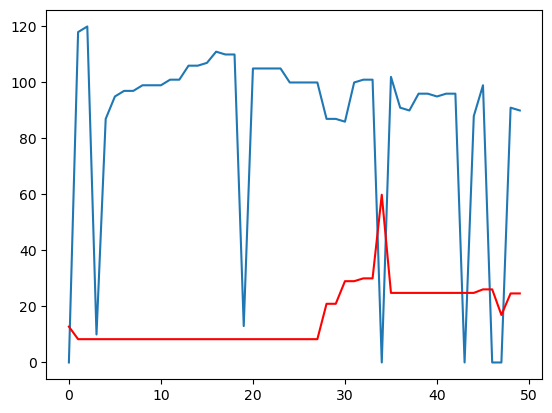

In [56]:
reload(predict_model)
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test[33:,], y_pred, 150, 200)

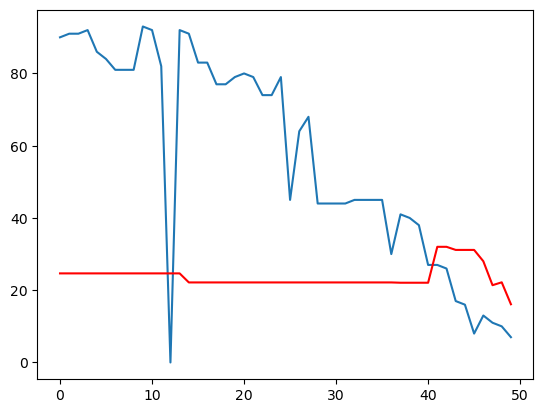

In [57]:
predict_model.compare_plots_pred_vs_true(Y_waittimedata_test[33:,], y_pred, 200,250)


In [58]:
X_historydata_test[33:323216]

,submit,start,end,reqcpus,nnodes,max_minutes,queue_minutes,backlog_minutes,backlog_num_jobs,running_num_jobs,running_minutes
242695,2022-06-25 23:34:46,2022-06-25 23:35:44,2022-06-25 23:36:15,78,6,120,0,93319,98,22360,9229013
242696,2022-06-25 23:35:38,2022-06-26 00:34:06,2022-06-26 00:36:51,68,1,2160,58,84689,92,22360,9229013
242697,2022-06-25 23:35:58,2022-06-26 00:34:06,2022-06-26 00:34:57,68,1,2160,58,86729,92,22360,9229013
242698,2022-06-25 23:35:59,2022-06-26 00:35:24,2022-06-26 00:38:47,68,1,2160,59,88889,93,22360,9229013
242699,2022-06-25 23:36:15,2022-06-25 23:37:11,2022-06-25 23:37:41,78,6,120,0,90749,93,22360,9229013
...,...,...,...,...,...,...,...,...,...,...,...
323211,2022-07-31 23:58:21,2022-08-01 00:02:54,2022-08-01 00:26:35,48,1,120,4,898116,394,22918,9692906
323212,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:58:18,48,1,120,5,898236,395,22918,9692906
323213,2022-07-31 23:58:22,2022-08-01 00:03:31,2022-08-01 00:41:48,48,1,120,5,898356,396,22918,9692906
323214,2022-07-31 23:58:28,2022-08-01 03:57:32,2022-08-01 06:07:16,100,2,180,239,898356,396,22918,9692906


In [59]:
reload(predict_model)
predict_model.inspect_test_data_lstm(X_historydata_test[33:323216],Y_waittimedata_test[33:,],y_pred,207,210, "set 1: 207: 210")
predict_model.inspect_test_data_lstm(X_historydata_test[33:323216],Y_waittimedata_test[33:,],y_pred,225,228, "set2: 225-228")
predict_model.inspect_test_data_lstm(X_historydata_test[33:323216],Y_waittimedata_test[33:,],y_pred,228, 231, "set3: 228-231")

------------------set 1: 207: 210-----------------------
qm test:[81 81 93]
qm pred:[[24.658745]
 [24.658745]
 [24.658745]]
X test:                    submit               start                 end  reqcpus  \
242902 2022-06-26 02:03:35 2022-06-26 03:24:53 2022-06-26 04:15:32       48   
242903 2022-06-26 02:03:36 2022-06-26 03:24:53 2022-06-26 04:00:21       48   
242904 2022-06-26 02:03:38 2022-06-26 03:37:15 2022-06-26 05:08:35      136   

        nnodes  max_minutes  queue_minutes  backlog_minutes  backlog_num_jobs  \
242902       1          120             81            33180                64   
242903       1          120             81            33300                65   
242904       2          240             93            33420                66   

        running_num_jobs  running_minutes  
242902             22360          9229013  
242903             22360          9229013  
242904             22360          9229013  
---------------------------------------------------

In [60]:
#df[242662:80554,]
#df[0:2]
df_run = df[242662+33:323216]

In [61]:
#print(X_historydata_test_rm)
run_mins = df_run["run_minutes"]
run_mins = run_mins.to_numpy()
print("run_minutes" + str(run_mins))
nnodes = df_run["nnodes"]
nnodes = nnodes.to_numpy()
print(" nnodes : " + str(nnodes))

print("run_mins.shape :" + str(run_mins.shape))
nnodes=np.array([nnodes]).T
print("nnodes.shape :" + str(nnodes.shape))

run_minutes[  0   2   0 ...  38 129 127]
 nnodes : [6 1 1 ... 1 2 2]
run_mins.shape :(80521,)
nnodes.shape :(80521, 1)


In [62]:
np.array([Y_waittimedata_test[33:,]]).T.shape


(80521, 1)

In [63]:
y_pred.shape

(80521, 1)

In [64]:
testY_test.shape

(80521, 1)

In [65]:
testY_test[2000:2200]
y_pred[2000:2200].ravel()

array([20.279495 , 18.585209 , 16.481403 , 57.366203 , 26.120544 ,
       26.120544 , 26.120544 , 26.120544 , 26.120544 , 26.120544 ,
       20.58957  , 11.657554 ,  1.844079 , 19.35115  , 20.70607  ,
       20.70607  , 19.516079 , 18.226528 , 18.226528 , 19.29602  ,
       19.29602  , 19.29602  , 19.491657 ,  3.2605124,  0.       ,
       24.959072 , 24.6502   , 24.6502   , 24.6502   , 24.6502   ,
       17.691101 , 18.825718 ,  3.4552908, 27.856224 , 27.856224 ,
       27.856224 , 20.04065  , 20.04065  , 20.04065  , 19.15446  ,
        7.912467 , 27.99432  , 15.2998   , 10.476199 , 29.157734 ,
       17.728588 , 17.728588 , 17.728588 , 17.94809  , 17.94809  ,
       19.325966 ,  1.8414965, 41.988895 , 41.988895 , 24.907856 ,
       24.907856 , 26.243748 , 18.693054 , 18.28164  , 20.919067 ,
       24.378021 , 11.858396 , 30.517914 , 18.514038 , 20.53305  ,
       20.53305  , 18.529766 , 18.529766 , 18.529766 , 20.227093 ,
        0.       , 68.94505  , 68.94505  , 28.2882   , 28.2882

In [66]:
reload(analyze_pred)
analyze_pred.analysis_pred_vs_orig_lstm(2000,200, testY_test.ravel(), y_pred.ravel(), nnodes.ravel(),
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    200
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    200
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 0-0=0

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    198
1      2
Name: count, dtype: int64


In [67]:
reload(analyze_pred)
analyze_pred.analysis_pred_vs_orig_lstm(0,80521,testY_test.ravel(), y_pred.ravel(), nnodes.ravel(),
                                   provision_time=20, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 20: scheduled?
0    73726
1     6795
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    78032
m     2489
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 6795-2489=4306

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    67387
1    13134
Name: count, dtype: int64


In [68]:
analyze_pred.analysis_pred_vs_orig_lstm(0,80521,testY_test.ravel(), y_pred.ravel(), nnodes.ravel(),
                                   provision_time=45, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 45: scheduled?
0    76768
1     3753
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    79262
m     1259
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 3753-1259=2494

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    70033
1    10488
Name: count, dtype: int64


In [69]:
analyze_pred.analysis_pred_vs_orig_lstm(0,80521,testY_test.ravel(), y_pred.ravel(), nnodes.ravel(),
                                   provision_time=60, tolerance_factor=3, print_flag=0)

Criteria 3: User desires a job to be dynamically scheduled : if actual_qtime> n*provision_time where n=3 
 provision_time in mins= 60: scheduled?
0    77239
1     3282
Name: count, dtype: int64
Criteria 4: Missed opportunity: if (predicted_qtime < n*provision_time) and  actual_qtime > n*provision_time: missed?
0    79463
m     1058
Name: count, dtype: int64
Criteria 4: Not Missed opportunity: 3282-1058=2224

 Criteria 5: Wrongly Scheduled : wrongly_scheduled?
0    70401
1    10120
Name: count, dtype: int64


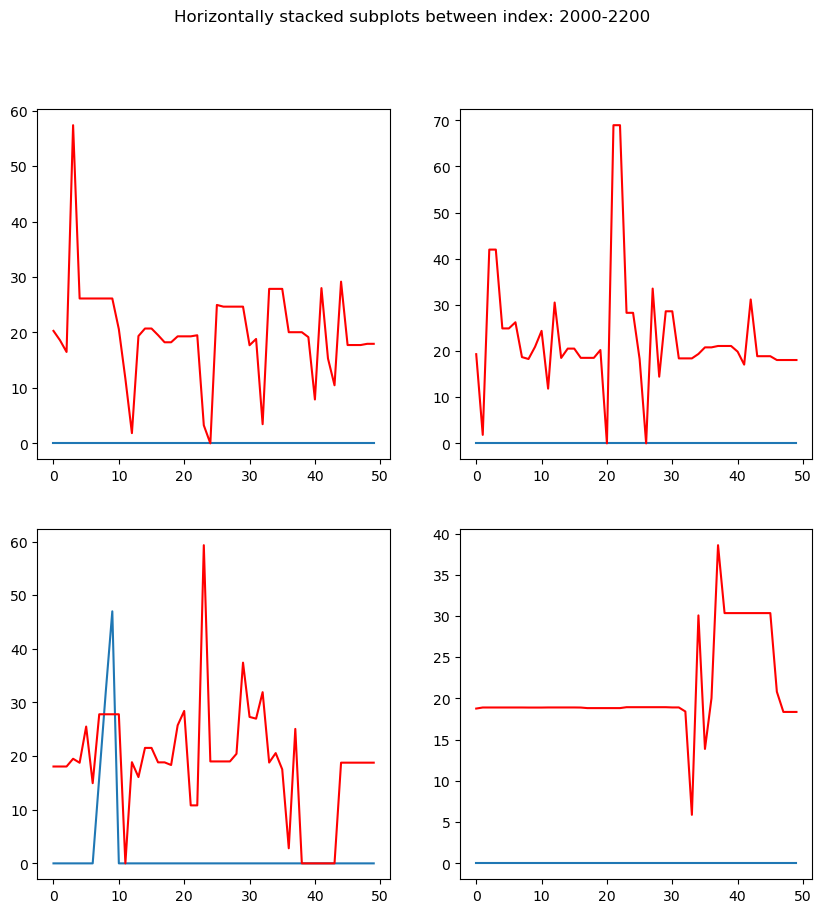

In [70]:
reload(analyze_pred)
analyze_pred.plot_pred_vs_orig_lstm(2000,50,testY_test.ravel(),y_pred.ravel())

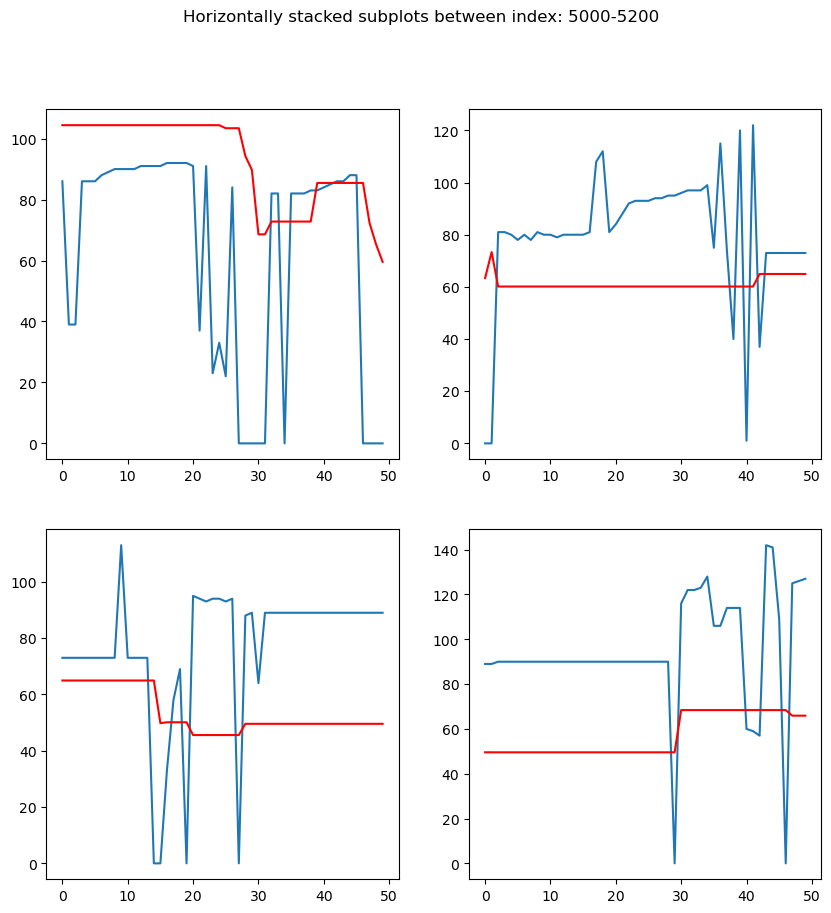

In [71]:
analyze_pred.plot_pred_vs_orig_lstm(5000,50,testY_test.ravel(),y_pred.ravel())

In [72]:
from sklearn.metrics import r2_score
r2_score(testY_test,y_pred)

0.057461347650210604